# Predicting Heart Disease Using Machine Learning

We are going to take the following steps:

### 1. Problem Definition

### 2. Data Preparation

### 3. Evaluation

### 4. Feature Engineering

### 5. Modeling

### 6. Experimentation



## 1. Problem Definition

Our objective is to predict the presence or absence of heart disease in a patient based on various medical features. This can help in early detection and treatment of heart disease. The goal is to build a model that can accurately classify patients into those with heart disease and those without it.


## 2. Data Preparation

We will use the UCI Heart Disease dataset. The dataset contains various medical features related to heart disease. 
The data will be split into training and testing sets to evaluate the performance of our models. 
For more details, visit the [UCI Heart Disease dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).


## 3. Evaluation

Our evaluation metric will be accuracy. If we can achieve an accuracy of 85% or higher, we will consider our model to be good enough for practical use. We will also use other metrics such as precision, recall, and F1-score to ensure the model's performance is robust across different aspects.


## 4. Features


### UCI Heart Disease Dataset Features

1. **Age**
   - **Description:** Age of the patient in years.
   - **Type:** Numeric

2. **Sex**
   - **Description:** Gender of the patient.
   - **Type:** Categorical (1 = male, 0 = female)

3. **cp** (Chest Pain Type)
   - **Description:** Type of chest pain experienced by the patient.
   - **Type:** Categorical
   - **Values:**
     - 1 = Typical angina
     - 2 = Atypical angina
     - 3 = Non-anginal pain
     - 4 = Asymptomatic

4. **trestbps** (Resting Blood Pressure)
   - **Description:** Resting blood pressure (in mm Hg) measured at the time of the patient’s admission to the hospital.
   - **Type:** Numeric

5. **chol** (Serum Cholesterol)
   - **Description:** Serum cholesterol level (in mg/dl) measured in the patient.
   - **Type:** Numeric

6. **fbs** (Fasting Blood Sugar)
   - **Description:** Fasting blood sugar level.
   - **Type:** Categorical
   - **Values:**
     - 1 = Fasting blood sugar > 120 mg/dl
     - 0 = Fasting blood sugar ≤ 120 mg/dl

7. **restecg** (Resting Electrocardiographic Results)
   - **Description:** Results of the resting electrocardiogram (ECG).
   - **Type:** Categorical
   - **Values:**
     - 0 = Normal
     - 1 = Having ST-T wave abnormality
     - 2 = Showing probable or definite left ventricular hypertrophy (LVH) by Estes' criteria

8. **thalach** (Maximum Heart Rate Achieved)
   - **Description:** Maximum heart rate achieved during exercise.
   - **Type:** Numeric

9. **exang** (Exercise Induced Angina)
   - **Description:** Presence of exercise-induced angina.
   - **Type:** Categorical
   - **Values:**
     - 1 = Yes
     - 0 = No

10. **oldpeak** (Depression Induced by Exercise Relative to Rest)
    - **Description:** Depression induced by exercise relative to rest (measured in mm).
    - **Type:** Numeric

11. **slope** (Slope of the Peak Exercise ST Segment)
    - **Description:** Slope of the peak exercise ST segment.
    - **Type:** Categorical
    - **Values:**
      - 1 = Upsloping
      - 2 = Flat
      - 3 = Downsloping

12. **ca** (Number of Major Vessels Colored by Fluoroscopy)
    - **Description:** Number of major vessels (0-3) colored by fluoroscopy.
    - **Type:** Numeric

13. **thal** (Thalassemia)
    - **Description:** Thalassemia status.
    - **Type:** Categorical
    - **Values:**
      - 1 = Normal
      - 2 = Fixed defect
      - 3 = Reversable defect

14. **target**
    - **Description:** Presence or absence of heart disease.
    - **Type:** Categorical (binary)
    - **Values:**
      - 1 = Presence of heart disease
      - 0 = Absence of heart disease


## 5. Modeling

We will use various machine learning models to predict heart disease, including:

- **Linear Regression** 
- **K-Nearest Neighbors (KNN)** 
- **Random Forest Classifier**


## 6. Experimentation

We will experiment with different hyperparameters and models to improve performance. 
The experimentation phase will include:

- **Hyperparameter Tuning:** Using techniques such as GridSea and RandomSearchCVrchCV to find the optimal parameters.
- **Model Comparison:** Evaluating and comparing different models based on their performance metrics.
- **Cross-Validation:** To ensure our model generalizes well on unseen data.
- **Feature Importance Analysis:** Understanding which features contribute most to the prediction.


## Preparing the tools

In [1]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [3]:
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

In [4]:
# Library for save model
import joblib

 ## Load data

In [5]:
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape  # (rows, columns)

(303, 14)

## Data Exploration (EDA)

The goal here is to understand the data and become a domain expert<br>
1. What questions are you trying to solve?<br>
2. What kind of data do we have and how to treat different types of data?<br>
3. What is missing from the data and how do you deal with it?<br>
4. What are the outliers and how to deal with them?<br>
5. How can you add, change or remove features to get more of the data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Target Variable Distribution

In [8]:
df["target"].value_counts()  # or df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64


The target variable is relatively balanced with 165 instances of heart disease and 138 instances without it. 


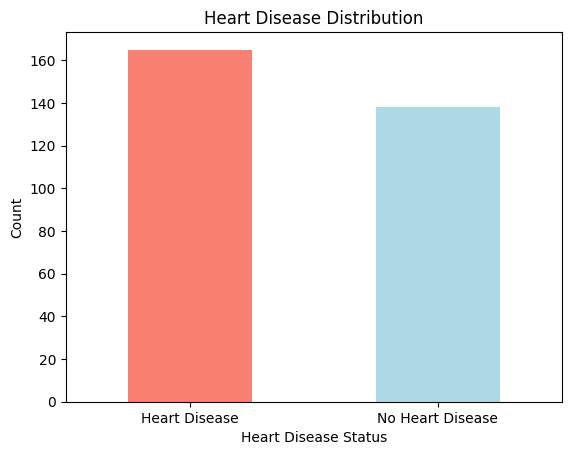

In [9]:
# Plotting the 'target' variable
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

plt.xticks(rotation=0, labels=["Heart Disease", "No Heart Disease"], ticks=[0, 1])
plt.xlabel("Heart Disease Status")
plt.ylabel("Count")
plt.title("Heart Disease Distribution")

plt.savefig("reports/01-target_distribution.png")

plt.show()

### Are there any missing values?

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In our dataset is no missing values, so no need to do imputation or filling NaN

### Information about df

In [11]:
df.info()  # Data types, non-null values, total values,...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe()  # Summary statistics of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [13]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

The 'sex' distribution shows that there are more females (207) than males (96) in the dataset. This indicates a gender imbalance, which may need to be considered during model training to ensure it does not skew the results.

### Compare Target column with sex column

In [14]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Proportion of heart disease between genders, ration is higher for men.

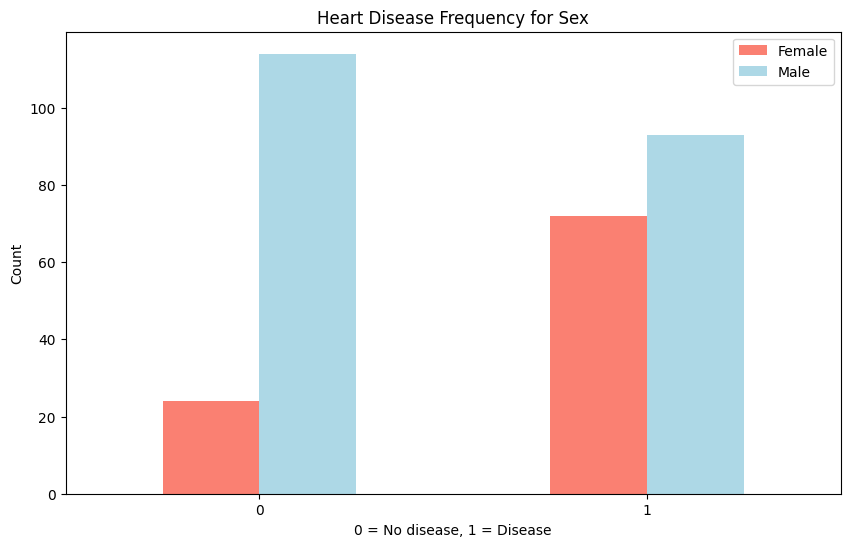

In [15]:
# Plotting the crosstab 'target' & 'sex'
pd.crosstab(df.target, df.sex).plot(
    kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]
)

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

plt.savefig("reports/02-target_sex.png")

plt.show()

### Age vs Max Heart Rate for Heart Disease

In [16]:
df["thalach"].value_counts()  # Better to use scatter plots for this, many values

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

#### Scatter with positive examples

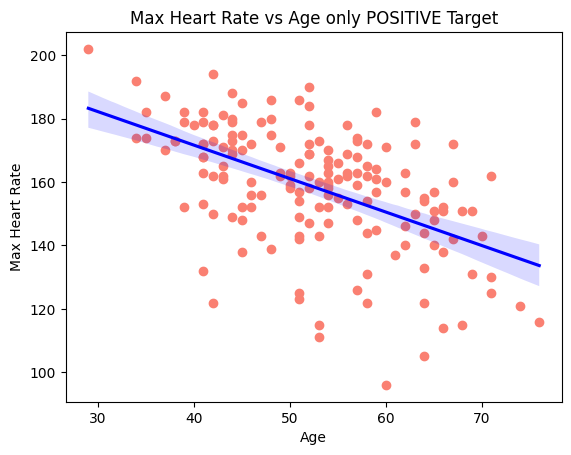

In [17]:
plt.scatter(df["age"][df["target"] == 1], df["thalach"][df["target"] == 1], c="salmon")

sns.regplot(
    x=df["age"][df["target"] == 1],
    y=df["thalach"][df["target"] == 1],
    scatter=False,
    color="blue",
)

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate vs Age only POSITIVE Target")

plt.savefig("reports/03-age_thalach_positive.png")

plt.show()

We can see here pattern, the more the older person is the lower heart rate has.

#### Scatter with negative examples

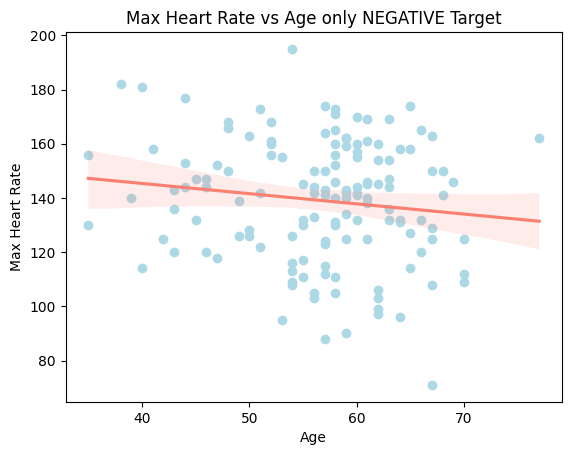

In [18]:
plt.scatter(
    df["age"][df["target"] == 0], df["thalach"][df["target"] == 0], c="lightblue"
)
sns.regplot(
    x=df["age"][df["target"] == 0],
    y=df["thalach"][df["target"] == 0],
    scatter=False,
    color="salmon",
)

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Max Heart Rate vs Age only NEGATIVE Target")

plt.savefig("reports/04-age_thalach_negative.png")

plt.show()

Here we cannot see here exact pattern, as like with positive values.

### Distribution of the age column with a histogram

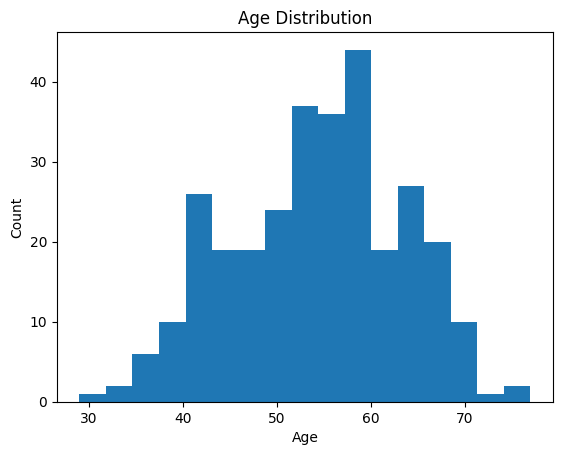

In [19]:
df["age"].plot.hist(bins=17)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.savefig("reports/05-age_distribution.png")

plt.show()

The distribution has a peak between 50 and 60, indicating that most individuals in this sample are in this ages. The count decreases towards the younger and older age groups.

### Heart Disease Frequency according to Chest Pain Type

In [20]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


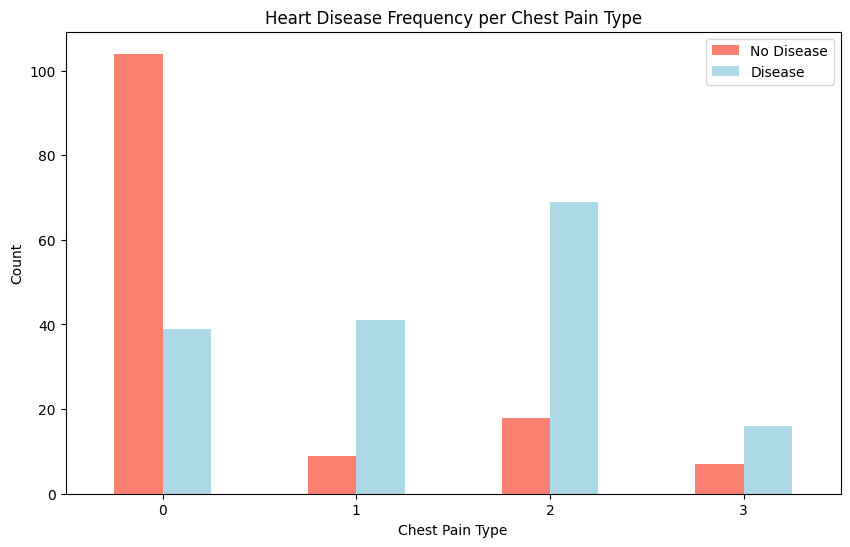

In [21]:
# Make the crosstab more visual
pd.crosstab(df["cp"], df["target"]).plot(
    kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]
)

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

plt.savefig("reports/06-cp_target.png")

plt.show()

From the data it looks like Chest Pain Type 0 is the lower risk and the Chest Pain type 1 and 2 are the most dangerous according to the proprotion of the taget variable.

### Dealing with Outliers

Let's look if we have some outliers in our data, they can be removed or changed in order to improve the model's accuracy.

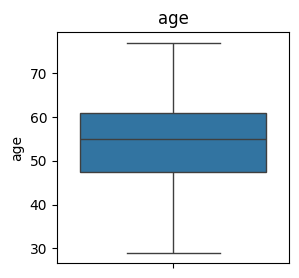

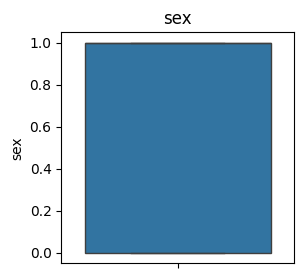

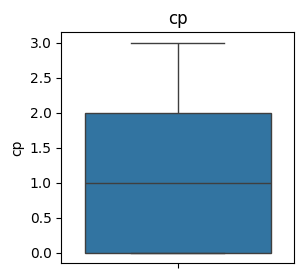

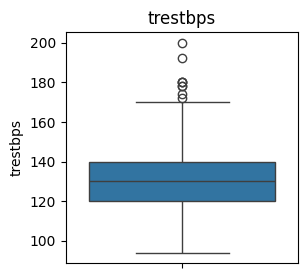

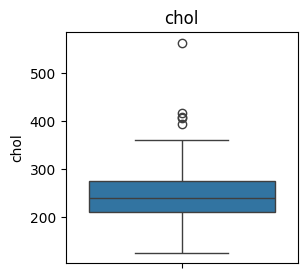

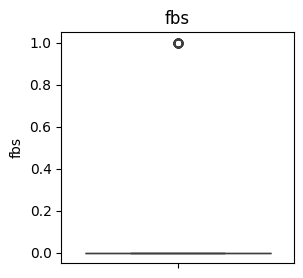

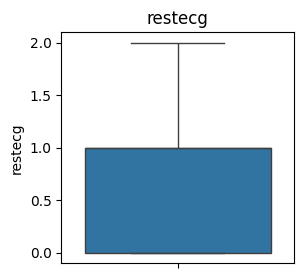

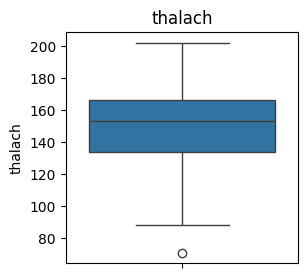

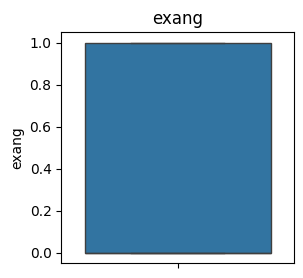

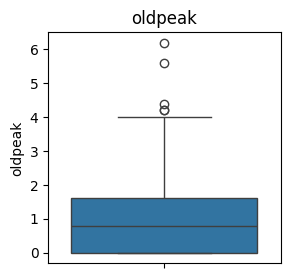

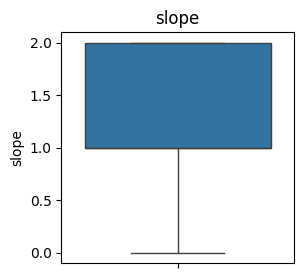

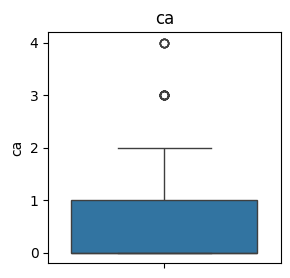

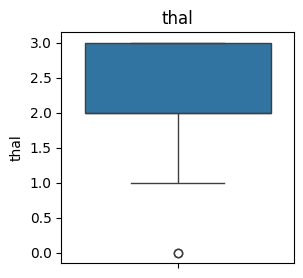

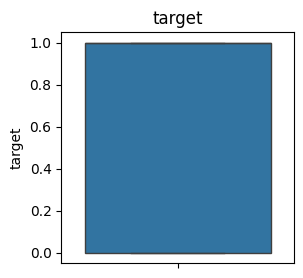

In [22]:
# Visualization outliers with boxplots

numeric_features = df.select_dtypes(
    exclude="object"
)  # selecting only numeric features (in fact all columns in our dataset)


def plot_boxplots(numeric_features):
    for col in numeric_features:
        plt.figure(figsize=(3, 3))
        sns.boxplot(y=col, data=df)
        plt.title(col)
        plt.show()


plot_boxplots(numeric_features)


We can observe that: <br>
    * age, sex, cp, fbs, restecg, exang, slope have no outliers <br>
    * trestbps, chol, talach, oldpeak, ca, thal have outliers <br>


Let's inspect outliers

In [23]:
columns_outliers = ["trestbps", "chol", "thalach", "oldpeak", "ca", "thal"]


def finding_outliers(columns_outliers):
    for col in columns_outliers:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if len(outliers) > 0:
            print(
                f"Feature: {col} Lower Bound: {lower_bound} Upper Bound: {upper_bound}, Number of Outliers: {len(outliers)}"
            )

In [24]:
finding_outliers(columns_outliers)

df_outliers = df.copy()

Feature: trestbps Lower Bound: 90.0 Upper Bound: 170.0, Number of Outliers: 9
Feature: chol Lower Bound: 115.75 Upper Bound: 369.75, Number of Outliers: 5
Feature: thalach Lower Bound: 84.75 Upper Bound: 214.75, Number of Outliers: 1
Feature: oldpeak Lower Bound: -2.4000000000000004 Upper Bound: 4.0, Number of Outliers: 5
Feature: ca Lower Bound: -1.5 Upper Bound: 2.5, Number of Outliers: 25
Feature: thal Lower Bound: 0.5 Upper Bound: 4.5, Number of Outliers: 2


#### **trestbps** (Resting Blood Pressure)
   - **Description:** Resting blood pressure (in mm Hg) measured at the time of the patient’s admission to the hospital.
   - **Type:** Numeric

In [25]:
df_outliers.loc[
    (df_outliers["trestbps"] < 90) | (df_outliers["trestbps"] > 170)
]  # All outliers in this column are over Upper Bound

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [26]:
round(df_outliers["trestbps"].mean())  # Mean value of trestbps

132

Let's set value of "trestbps" to mean value where target is 0.

In [27]:
df_outliers.loc[
    (df_outliers["trestbps"] > 170) & (df_outliers["target"] == 0), "trestbps"
] = round(df_outliers["trestbps"].mean())

In [28]:
df_outliers.loc[(df_outliers["trestbps"] > 170) & (df_outliers["target"] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [29]:
df_outliers[df_outliers["trestbps"] == 132]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
203,68,1,2,132,274,1,0,150,1,1.6,1,0,3,0
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
223,56,0,0,132,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,132,249,0,1,143,1,0.0,1,0,2,0
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0


#### **chol** (Serum Cholesterol)
   - **Description:** Serum cholesterol level (in mg/dl) measured in the patient.
   - **Type:** Numeric

An ideal total cholesterol level ranges from 140 to 200mg/dl. When it reaches 300, the risk of having a heart attack more than doubles.

In [30]:
df_outliers.loc[(df_outliers["chol"] < 115.75) | (df_outliers["chol"] > 369.75)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In this case we will set mean of chol, where target variable is 0. Because with chol over 300 chance to have heart disease is high.

In [31]:
mean_chol = df_outliers["chol"].mean()
mean_chol = mean_chol.astype(int)
df_outliers.loc[
    (df_outliers["chol"] > 369.75) & (df_outliers["target"] == 0), "chol"
] = mean_chol

In [32]:
# Let's check

df_outliers.loc[(df_outliers["chol"] < 115.75) | (df_outliers["chol"] > 369.75)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


#### **thalach** (Maximum Heart Rate Achieved)
   - **Description:** Maximum heart rate achieved during exercise.
   - **Type:** Numeric

In [33]:
df_outliers.loc[(df_outliers["thalach"] < 84.75) | (df_outliers["thalach"] > 214.75)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


We will leave this outlier as it is, target variable is 0.

#### **oldpeak** (Depression Induced by Exercise Relative to Rest)
- **Description:** Depression induced by exercise relative to rest (measured in mm).
- **Type:** Numeric

In [34]:
df_outliers.loc[(df_outliers["oldpeak"] < -2.4) | (df_outliers["oldpeak"] > 4)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [35]:
round(df["oldpeak"].mean())

1

In [36]:
# Set the mean where target is 0
df_outliers.loc[
    (df_outliers["oldpeak"] > 4) & (df_outliers["target"] == 0), "oldpeak"
] = round(df_outliers["oldpeak"].mean(), 1)

In [37]:
# Check result
df_outliers.loc[(df_outliers["oldpeak"] == round(df_outliers["oldpeak"].mean(), 1))]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
204,62,0,0,160,164,0,0,145,0,1.0,0,3,3,0
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
221,55,1,0,140,217,0,1,111,1,1.0,0,0,3,0
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0


#### **ca** (Number of Major Vessels Colored by Fluoroscopy)
- **Description:** Number of major vessels (0-3) colored by fluoroscopy.
- **Type:** Numeric

In [38]:
df_outliers["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [39]:
df_outliers.loc[(df_outliers["ca"] < -1.5) | (df_outliers["ca"] > 2.5)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


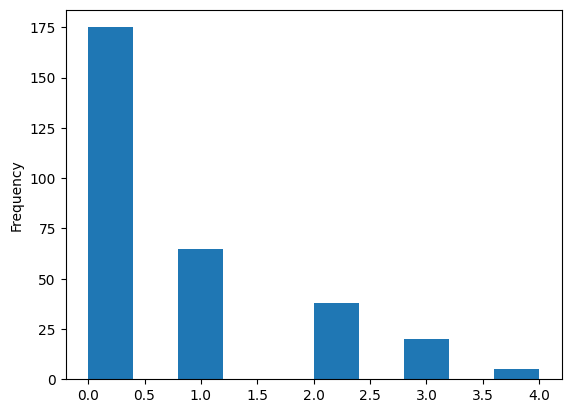

In [40]:
# Let's check distribution
df["ca"].plot(kind="hist")

plt.show()

We will leave them as it is, it's ordinal variable.

#### **thal** (Thalassemia)
- **Description:** Thalassemia status.
 - **Type:** Categorical
- **Values:**
  - 1 = Normal
  - 2 = Fixed defect
  - 3 = Reversable defect

In [41]:
df_outliers.loc[(df_outliers["thal"] < 0.5) | (df_outliers["thal"] > 4.5)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [42]:
df_outliers["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

We should't have value 0 in this column. We will delete records where "thal" is 0.

In [43]:
df_outliers = df_outliers[df_outliers["thal"] != 0]

In [44]:
# Let's check
df_outliers["thal"].unique()

array([1, 2, 3], dtype=int64)

In [45]:
# Save the cleaned data
df_outliers.to_csv("data/heart_disease_cleaned.csv", index=False)

### Finding Correlation

In [46]:
# Loading the cleaned data
df_cleaned = pd.read_csv("data/heart_disease_cleaned.csv")
df_raw = pd.read_csv("data/heart-disease.csv")

In [47]:
df_cleaned.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099038,-0.069189,0.274803,0.208300,0.124411,-0.116305,-0.400677,0.098122,0.215294,-0.169296,0.275859,0.066057,-0.226722
sex,-0.099038,1.000000,-0.042702,-0.016204,-0.175331,0.038182,-0.065573,-0.052430,0.136230,0.101584,-0.024680,0.117098,0.211320,-0.276170
cp,-0.069189,-0.042702,1.000000,0.082606,-0.060381,0.104591,0.050844,0.303774,-0.390386,-0.113147,0.115095,-0.181775,-0.169712,0.430167
trestbps,0.274803,-0.016204,0.082606,1.000000,0.085436,0.131189,-0.134595,-0.056918,0.008541,0.155055,-0.089639,0.099401,0.023529,-0.089765
chol,0.208300,-0.175331,-0.060381,0.085436,1.000000,0.028735,-0.134829,-0.014731,0.064224,0.029505,0.009857,0.032690,0.063697,-0.066328
fbs,0.124411,0.038182,0.104591,0.131189,0.028735,1.000000,-0.093878,-0.013002,0.013534,0.026653,-0.054079,0.144331,-0.007605,-0.018382
restecg,-0.116305,-0.065573,0.050844,-0.134595,-0.134829,-0.093878,1.000000,0.038535,-0.077865,-0.103526,0.098733,-0.072637,-0.014051,0.144427
thalach,-0.400677,-0.052430,0.303774,-0.056918,-0.014731,-0.013002,0.038535,1.000000,-0.386745,-0.340331,0.394711,-0.217336,-0.118205,0.430447
exang,0.098122,0.136230,-0.390386,0.008541,0.064224,0.013534,-0.077865,-0.386745,1.000000,0.299754,-0.254076,0.118191,0.228084,-0.432743
oldpeak,0.215294,0.101584,-0.113147,0.155055,0.029505,0.026653,-0.103526,-0.340331,0.299754,1.000000,-0.532841,0.171128,0.206906,-0.416071


Make it more visual

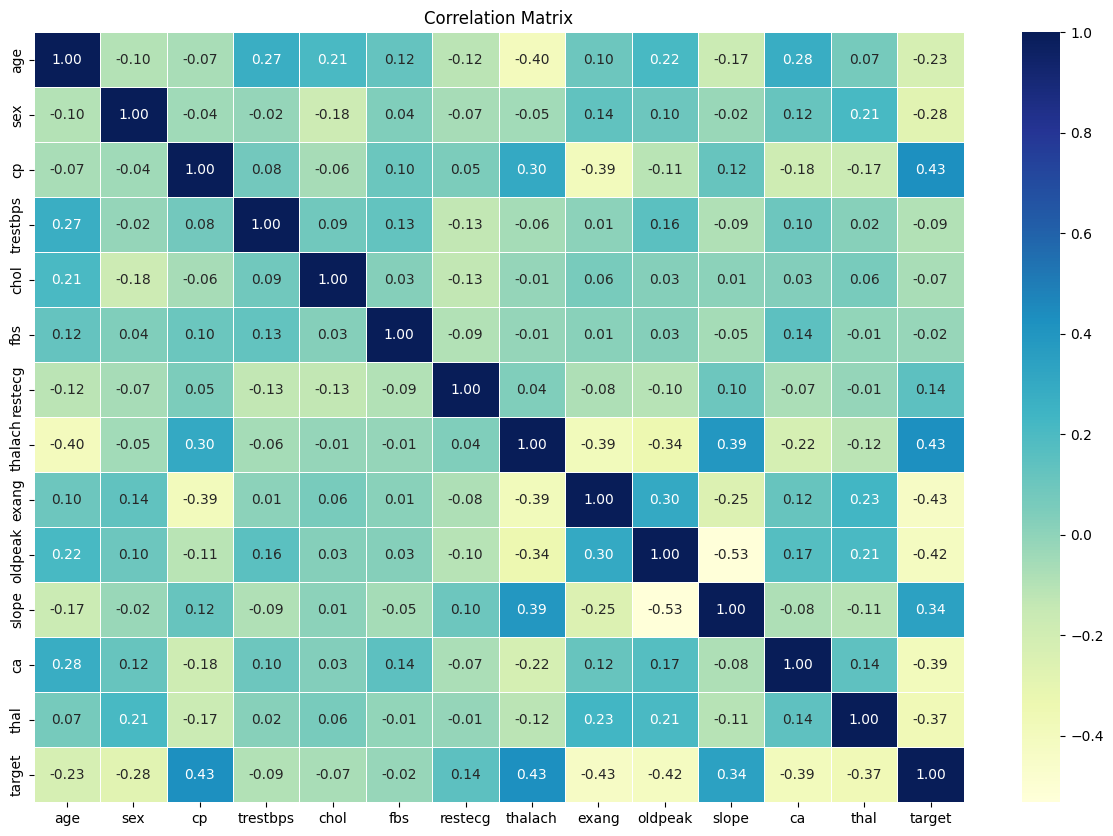

In [48]:
corr_matrix = df_cleaned.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
ax.set_title("Correlation Matrix")

plt.savefig("reports/07-correlation_matrix.png")

plt.show()

## Modeling

Splitting the cleaned data.

In [49]:
# Split data into X and y cleaned
X_cleaned = df_cleaned.drop("target", axis=1)
y_cleaned = df_cleaned["target"]

In [50]:
# Split data into train and test sets cleaned
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

Splitting the raw data.

In [51]:
X = df_raw.drop("target", axis=1)
y = df_raw["target"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### We are going to try 3 different models
1. Logistic Regression<br>
2. K-Nearest Neighbor<br>
3. Random Forest Classifier

In [53]:
# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
}

In [54]:
def fit_and_score(
    models, X_train, X_test, y_train, y_test, cross_val=False, cv=5
):
    """
    Fits and evaluates given machine learning models.

    Args:
        models (dict): A dictionary containing different Scikit-Learn machine learning models.
        X_train (ndarray): Training data.
        y_train (ndarray): Training labels.
        X_test (ndarray, optional): Testing data (required for basic accuracy). Defaults to None.
        y_test (ndarray, optional): Testing labels (required for basic accuracy). Defaults to None.
        cross_val (bool, optional): Whether to use cross-validation for evaluation (default: False).
        cv (int, optional): Number of folds for cross-validation (default: 5).

    Returns:
        dict: A dictionary containing model names as keys and their scores as values.
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model with cross-validation
        if cross_val:
            scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
            model_scores[name] = np.mean(scores)  # Average cross-validation scores
        else:
            # Basic accuracy evaluation (if test data is provided)
            model.fit(X_train, y_train)
            model_scores[name] = model.score(X_test, y_test)


    return model_scores

Let's compare the data on different models.

In [55]:
model_scores_cleaned = fit_and_score(
    models, X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned, cross_val=True, cv=5
)

print("Cleaned Data:")
model_scores_cleaned

Cleaned Data:


{'Logistic Regression': 0.8375,
 'KNN': 0.6083333333333334,
 'Random Forest Classifier': 0.8208333333333334}

In [56]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test, cross_val=True, cv=5)

print("Raw Data:")
model_scores

Raw Data:


{'Logistic Regression': 0.8138605442176872,
 'KNN': 0.6488095238095238,
 'Random Forest Classifier': 0.7934523809523809}

Besides the KNN model we can see that all models are better with cleaned data. (We used cross-validation)

The higher score have 'Logistic Regression' & 'Random Forest Classifier' and lower accuracy has 'KNN'.

Let's try to use **MinMax Scaler** to put feature variables on one scale.

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

model_scores_cleaned_scaled = fit_and_score(
    models,
    X_train_cleaned_scaled,
    X_test_cleaned_scaled,
    y_train_cleaned,
    y_test_cleaned,
    cross_val=True,
    cv=5,
)
print("Cleaned Data Scaled:")
model_scores_cleaned_scaled


Cleaned Data Scaled:


{'Logistic Regression': 0.8416666666666668,
 'KNN': 0.8,
 'Random Forest Classifier': 0.8166666666666668}

In [59]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scores_scaled = fit_and_score(
    models, X_train_scaled, X_test_scaled, y_train, y_test, cross_val=True, cv=5
)

print("Raw Data Scaled:")
model_scores_scaled

Raw Data Scaled:


{'Logistic Regression': 0.7974489795918368,
 'KNN': 0.7931122448979592,
 'Random Forest Classifier': 0.7976190476190477}

According to the cross-validated accuracy, we will use **MinMax Scaler** on **cleaned data**.

In [60]:
df = pd.read_csv("data/heart_disease_cleaned.csv")

scaler = MinMaxScaler()

# All columns are numeric so we can use directly no need to filter df
scaled_data = scaler.fit_transform(df)

df = pd.DataFrame(scaled_data, columns=df.columns)

# Save to csv
df.to_csv("data/heart-disease_cleaned_scaled.csv")

### Model Comparison

In [61]:
X_train = X_train_cleaned_scaled.copy()
X_test = X_test_cleaned_scaled.copy()
y_train = y_train_cleaned.copy()
y_test = y_test_cleaned.copy()

X = df.drop("target", axis=1)
y = df["target"]

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores # We will store NOT cross-val accuracy to compare each models

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

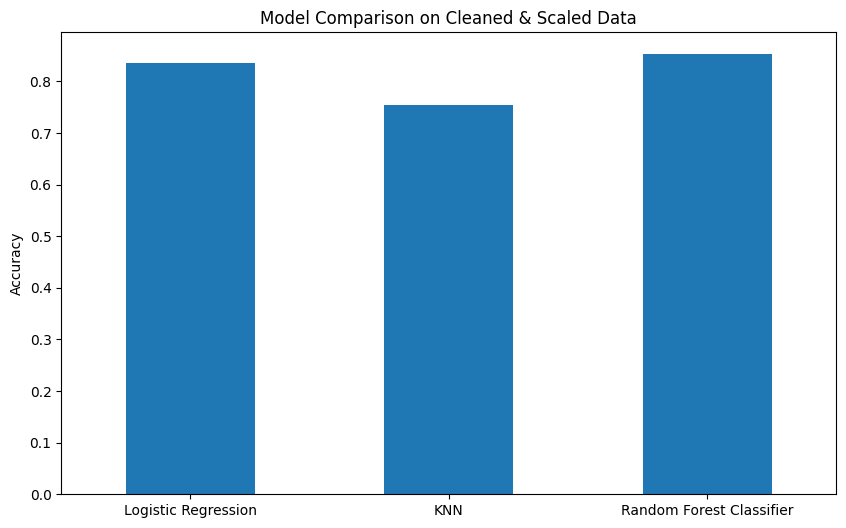

In [62]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(10, 6))
plt.title("Model Comparison on Cleaned & Scaled Data")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.legend().set_visible(False)

plt.savefig("reports/08-model_comparison_cleaned_scaled.png")
plt.show()

Now we have baseline model, let's try to improve it.

Next steps: <br>
* Hyperparameter Tuning<br>
* Feature importance<br>
* Confusion matrix<br>
* Cross-Validation<br>
* Precision<br>
* Recall<br>
* F1-score<br>
* Classification Report<br>
* Roc curve<br>
* Area under curve (AUC)

### Hyperparameter tuning

#### Hyperparameter Tuning for KNN (by hand, RandomizedSearchCV, GridSearchCV)

In [63]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21, 2)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    print(f"Training model with {i} neighbors")
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(X_train, y_train)
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Training model with 1 neighbors
Training model with 3 neighbors
Training model with 5 neighbors
Training model with 7 neighbors
Training model with 9 neighbors
Training model with 11 neighbors
Training model with 13 neighbors
Training model with 15 neighbors
Training model with 17 neighbors
Training model with 19 neighbors


In [64]:
train_scores

[1.0,
 0.875,
 0.8583333333333333,
 0.8416666666666667,
 0.8541666666666666,
 0.8416666666666667,
 0.8291666666666667,
 0.8208333333333333,
 0.8291666666666667,
 0.825]

In [65]:
test_scores

[0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885]

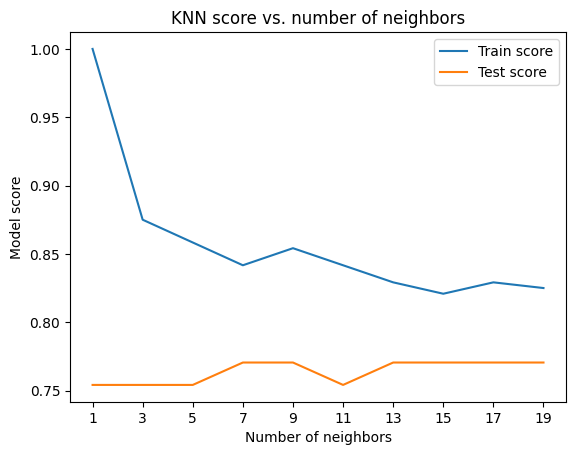

In [66]:
# Visualizing train and test score for KNN
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 2))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.title("KNN score vs. number of neighbors")

plt.savefig("reports/09-knn_score_vs_neighbors.png")

plt.show()

In [67]:
print(f"N_neighbors: {np.argmax(test_scores) * 2 + 1}\nThe maximum KNN score on the test data: {max(test_scores) * 100:.2f}%.")

N_neighbors: 7
The maximum KNN score on the test data: 77.05%.


In [68]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

**Improvement!!!** Accuracy is little higher. Let's try to make it with RandomSearchCV.

In [69]:
# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid to search
knn_grid = {
    "n_neighbors": np.arange(1, 21, 2),  # Number of neighbors to consider
    "metric": ["euclidean", "manhattan", "minkowski"],  # Distance metrics
    "weights": ["uniform", "distance"],  # Weight function
}

# Perform RandomizedSearchCV to find the best parameters
rs_knn = RandomizedSearchCV(
    knn, knn_grid, n_iter=50, cv=5, scoring="accuracy", random_state=42
)
rs_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params = rs_knn.best_params_
best_score = rs_knn.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Best Cross-Validation Accuracy: 0.8416666666666668


Also with GridSearchCV

In [70]:
# Define the KNN model
knn = KNeighborsClassifier()

np.random.seed(42)

# Define the parameter grid to search
knn_grid = {
    "n_neighbors": [3, 5, 7, 9],  # Number of neighbors to consider
    "metric": ["euclidean", "manhattan", "minkowski"],  # Distance metrics
    "weights": ["uniform", "distance"],  # Weight function
}

# Perform GridSearchCV to find the best parameters
gs_knn = GridSearchCV(knn, knn_grid, cv=5, scoring="accuracy")
gs_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params = gs_knn.best_params_
best_score = gs_knn.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8458333333333334


We have better results with GridSearchCV so we will use it.

In [71]:
# Set up our KNN model with best hyperparameters

knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)

print(
    f"KNN Accuracy on test data: {knn_accuracy*100:.2f}%."
)
print(f"Best parameters: {best_params}")

KNN Accuracy on test data: 78.69%.
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [72]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

As we can see, tunned model with GridSearchCV is better than baseline model. Also model with 7 neighbors have slightly lower accuracy. We will consider our tunned model as best KNN model and save it.

In [73]:
# Saving the model with joblib
joblib.dump(knn, "models/knn_best.pkl")

['models/knn_best.pkl']

##### Evaluate KNN Models

In [74]:
knn_baseline = KNeighborsClassifier()
knn_7_neighbors = KNeighborsClassifier(n_neighbors=7)
knn_tunned = joblib.load("models/knn_best.pkl")

knn_models = fit_and_score(
    {"knn_baseline": knn_baseline, "knn_7_neighbors": knn_7_neighbors, "knn_tunned": knn_tunned},
    X_train,
    X_test,
    y_train,
    y_test,
    cross_val=True,
    cv=5
)

print("KNN Models (Cross-Validated):")
knn_models

KNN Models (Cross-Validated):


{'knn_baseline': 0.8,
 'knn_7_neighbors': 0.8166666666666667,
 'knn_tunned': 0.8458333333333334}

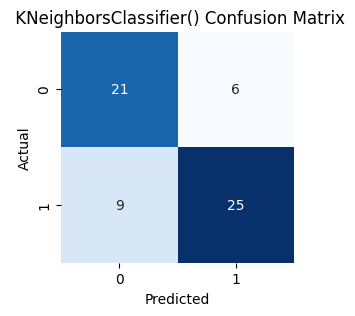

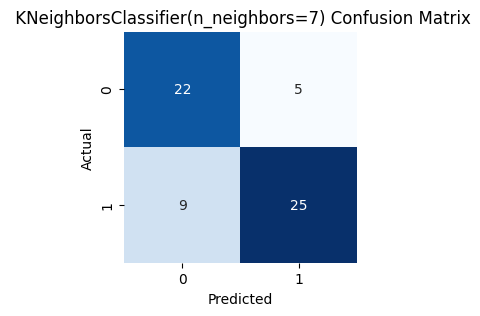

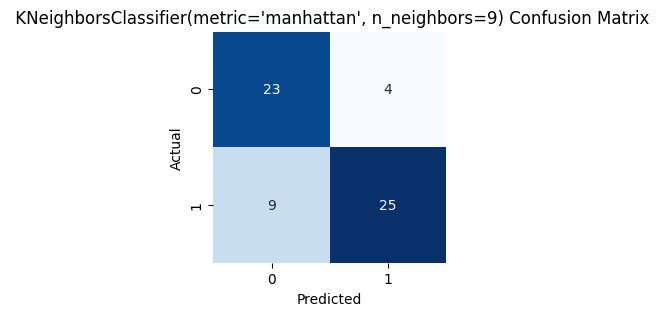

In [75]:
# Plotting confusion matrix
for model in [knn_baseline, knn_7_neighbors, knn_tunned]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.title(f" {model} Confusion Matrix")
    plt.show()

From confusion matrix we can see that **tunned model** gives us **best results** between classes (TP, FP, FN, TN). 

In [76]:
# Classification report
for model in [knn_baseline, knn_7_neighbors, knn_tunned]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("-------------------")
    print(f"Classification Report {model}:")
    print(report)

-------------------
Classification Report KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.81      0.74      0.77        34

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

-------------------
Classification Report KNeighborsClassifier(n_neighbors=7):
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.83      0.74      0.78        34

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61

-------------------
Classification Report KNeighborsClassifier(metric='manhattan', n_neighbors=9):
              precision    recall  f1-score   support

           0       0.72      0.85      0.78    

Classification reports confirmed us that tunned model is the best KNN model.

#### Hyperparameter Tuning with RandomizedSearchCV (LogisticRegression & RandomForestClassifier)

Create a hyperparameter grid for LogisticRegression

In [77]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear", "lbfgs"],
    "max_iter": np.arange(100, 5000, 100),
}

Create a hyperparameter grid for RandomForestClassifier

In [78]:
rf_grid = {
    "n_estimators": range(10, 101),
    "criterion": ["gini", "entropy"],
    "max_depth": range(2, 51),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}

##### Tune LogisticRegression

Setup random hyperparameter search for LogisticRegression

In [79]:
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=50,
    verbose=True,
    random_state=42,
)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

best_params = rs_log_reg.best_params_
best_score = rs_log_reg.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'solver': 'lbfgs', 'max_iter': 1700, 'C': 1.623776739188721}
Best Accuracy: 0.8458333333333334


In [80]:
# Initialize the model

log_reg_best = LogisticRegression(**rs_log_reg.best_params_)
log_reg_best.fit(X_train, y_train)

log_reg_accuracy = log_reg_best.score(X_test, y_test)
log_reg_accuracy

print(f"Accuracy: {log_reg_accuracy*100:.2f}%.")


Accuracy: 83.61%.


In [81]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

Same accuracy as baseline. We will try to use GridSearchCV.

##### Tune RandomForestClassifier

Setup random hyperparameter search for RandomForestClassifier

In [82]:
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=100,
    verbose=True,
    random_state=42,
)

Fit random hyperparameter search model for RandomForestClassifier

In [83]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 51),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 101)},
                   random_state=42, verbose=True)

Best hyperparameters

In [84]:
rs_rf.best_params_

{'n_estimators': 58,
 'min_samples_split': 7,
 'min_samples_leaf': 9,
 'max_features': 'sqrt',
 'max_depth': 38,
 'criterion': 'entropy',
 'bootstrap': True}

In [85]:
rs_rf.best_score_

0.8458333333333332

In [86]:
np.random.seed(42)

rf_best_rand = RandomForestClassifier(**rs_rf.best_params_)

rf_best_rand.fit(X_train, y_train)

rf_accuracy = rf_best_rand.score(X_test, y_test)

print(f"Random Forest Accuracy on test data: {rf_accuracy*100:.2f}%.")
print(f"Best parameters: {rs_rf.best_params_}")

# Save the model
joblib.dump(rf_best_rand, "models/rf_rs.pkl")

Random Forest Accuracy on test data: 86.89%.
Best parameters: {'n_estimators': 58, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 38, 'criterion': 'entropy', 'bootstrap': True}


['models/rf_rs.pkl']

In [87]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

We can see the improvement in 'Random Forest Classifier' with comparasion with Baseline model.

#### Hyperparameter tuning with GridSearchCV (LogisticRegression & RandomForestClassifier)

##### Logistic Regression

Hyperparameters for LogisticRegression

In [88]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear", "lbfgs"],
    "max_iter": np.arange(500, 1000, 100),
}

Setup grid hyperparameter search for LogisticRegression

In [89]:
np.random.seed(42)
gs_log_reg = GridSearchCV(
    LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True
)

In [90]:
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': array([500, 600, 700, 800, 900]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [91]:
gs_log_reg.best_params_, gs_log_reg.best_score_

({'C': 1.623776739188721, 'max_iter': 500, 'solver': 'lbfgs'},
 0.8458333333333334)

In [92]:
# Setting up Best Model
np.random.seed(42)

log_reg_best = LogisticRegression(**gs_log_reg.best_params_)

log_reg_best.fit(X_train, y_train)

log_reg_accuracy = log_reg_best.score(X_test, y_test)

print(f"Accuracy: {log_reg_accuracy*100:.2f}%")

Accuracy: 83.61%


In [93]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

Base line model has same accuracy as tuned model with RandomSearchCV and also with GridSearchCV. So we will save these models and later evaluate them.


LogisticRegression:

Best params RandomizedSearchCV : Best Parameters: {'solver': 'lbfgs', 'max_iter': 1700, 'C': 1.623776739188721} </br>
Best params GridSearchCV : Best Parameters: {'C': 1.623776739188721, 'max_iter': 500, 'solver': 'lbfgs'} </br> 


In [94]:
# Initialize base line model
log_reg_baseline = LogisticRegression()
log_reg_baseline.fit(X_train, y_train)

# Initialize best model (GridSearchCV)
log_reg_gs = LogisticRegression(**gs_log_reg.best_params_)
log_reg_gs.fit(X_train, y_train)

# Initialize best model (RandomizedSearchCV)
log_reg_rs = LogisticRegression(
    C=1.623776739188721, max_iter=1700, solver="lbfgs"
)
log_reg_rs.fit(X_train, y_train)

# Saving into models
joblib.dump(log_reg_baseline, "models/log_reg_baseline.pkl")
joblib.dump(log_reg_rs, "models/log_reg_rs.pkl")
joblib.dump(log_reg_gs, "models/log_reg_gs.pkl")

['models/log_reg_gs.pkl']

##### Random Forest Classifier

Hyperparameters for Random Forest Classifier

In [95]:
rf_grid = {
    "n_estimators": [30, 32, 34, 36, 38],  # Focused around the best value 34
    "max_depth": [40, 42, 44, 46, 48, 50],  # Focused around the best value 44
    "min_samples_split": [2, 3, 4],  # Focused around the best value 3
    "min_samples_leaf": [7, 8, 9, 10, 11],  # Focused around the best value 9
}

Set up Grid Search for Random Forest Classifier

In [96]:
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5, verbose=True)

In [97]:
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40, 42, 44, 46, 48, 50],
                         'min_samples_leaf': [7, 8, 9, 10, 11],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [30, 32, 34, 36, 38]},
             verbose=True)

In [98]:
gs_rf.best_params_, gs_rf.best_score_

({'max_depth': 48,
  'min_samples_leaf': 8,
  'min_samples_split': 2,
  'n_estimators': 34},
 0.8541666666666667)

In [99]:
# Setting up Best Model
np.random.seed(42)

rf_best_gs = RandomForestClassifier(**gs_rf.best_params_)

rf_best_gs.fit(X_train, y_train)

rf_accuracy = rf_best_gs.score(X_test, y_test)

# Saving into models

joblib.dump(rf_best_gs, "models/rf_gs.pkl")

print(f"Accuracy: {rf_accuracy*100:.2f}%")

Accuracy: 88.52%


In [100]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

Parameters found with GridSearchCV has the best accuracy. Let's compare Random Forest Classifiers.

#### Evaluating Logistic Regression Classifiers

In [101]:
log_reg_baseline = joblib.load("models/log_reg_baseline.pkl")
log_reg_gs = joblib.load("models/log_reg_gs.pkl")
log_reg_rs = joblib.load("models/log_reg_rs.pkl")

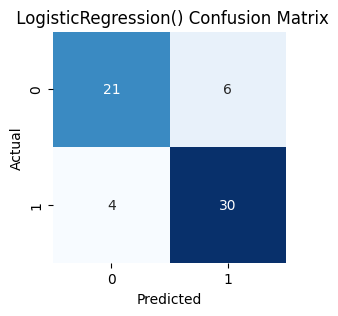

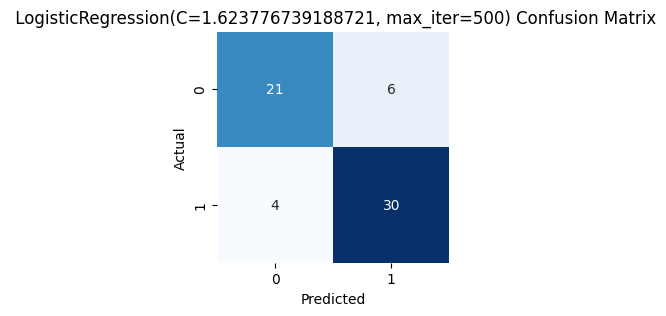

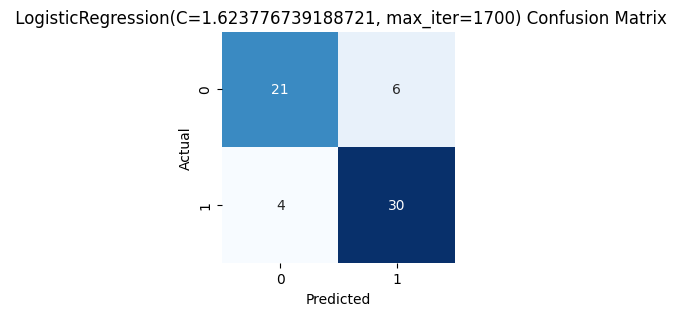

In [102]:
# Plotting confusion matrix
for model in [log_reg_baseline, log_reg_gs, log_reg_rs]:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.title(f" {model} Confusion Matrix")
    plt.show()

From above confusion matrices we can see that all Logistic Regression models are performing equally.

In [103]:
# Classification reports
for model in [log_reg_baseline, log_reg_gs, log_reg_rs]:
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("-------------------")
    print(f"Classification Report {model}:")
    print(report)

-------------------
Classification Report LogisticRegression():
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

-------------------
Classification Report LogisticRegression(C=1.623776739188721, max_iter=500):
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

-------------------
Classification Report LogisticRegression(C=1.623776739188721, max_iter=1700):
              precision    recall  f1-score   support

           0       0.84      0.7

From classification reports we can see that all Logistic Regression models are performing equally. So we will keep onr model as best Logistic Regression classifier.

In [104]:
# Saving final Logistic Regression model
joblib.dump(log_reg_rs, "models/log_reg_best.pkl")

['models/log_reg_best.pkl']

#### Evaluating Random Forest Classifiers

In [105]:
rf_rs = joblib.load("models/rf_rs.pkl")
rf_gs = joblib.load("models/rf_gs.pkl")
rf_baseline = RandomForestClassifier().fit(X_train, y_train)

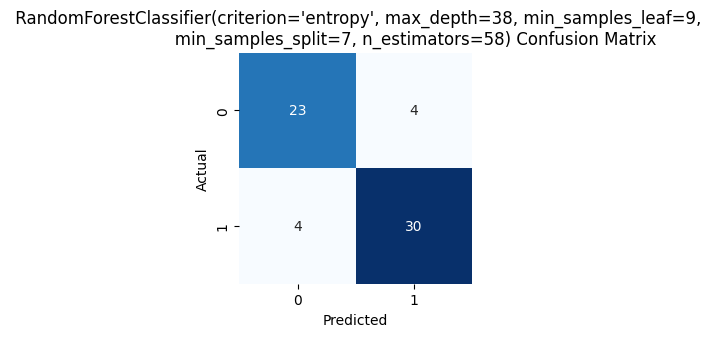

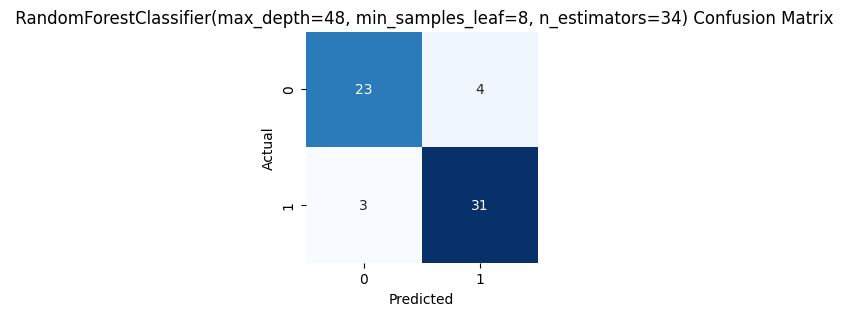

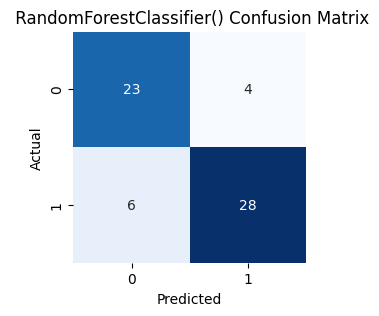

In [106]:
# Plotting confusion matrix
for model in [rf_rs, rf_gs, rf_baseline]:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.title(f" {model} Confusion Matrix")
    plt.show()

According to confusion matrix we can see that model with GridSearchCV hyperparameters is performing best. Let's see classification reports.

In [107]:
# Classification reports
for model in [rf_rs, rf_gs, rf_baseline]:
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("-------------------")
    print(f"Classification Report {model}:")
    print(report)

-------------------
Classification Report RandomForestClassifier(criterion='entropy', max_depth=38, min_samples_leaf=9,
                       min_samples_split=7, n_estimators=58):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

-------------------
Classification Report RandomForestClassifier(max_depth=48, min_samples_leaf=8, n_estimators=34):
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

-------------------
Classification Report Rando

From classification reports we can see that model with GridSearchCV hyperparameters is performing best. So we will keep this tunned model as best Random Forest Classifier.

In [108]:
# Saving final Random Forest Classifier model
joblib.dump(rf_gs, "models/rf_best.pkl")

['models/rf_best.pkl']

#### Saving Best Models into Dictionary

In [109]:
best_models = {
    "Logistic Regression": joblib.load("models/log_reg_best.pkl"),
    "KNN": joblib.load("models/knn_best.pkl"),
    "RandomForestClassifier": joblib.load("models/rf_best.pkl"),
}

model_scores_best = fit_and_score(best_models, X_train, X_test, y_train, y_test)

model_scores_best

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7868852459016393,
 'RandomForestClassifier': 0.8852459016393442}

In [110]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.7540983606557377,
 'Random Forest Classifier': 0.8524590163934426}

We improved our 2 models, Logistic Regression is same as baseline model.

### Evaluating our best machine learning classifiers
1. Roc curve & AUC score<br>
2. Confusion matrix<br>
3. Classification report<br>
4. Accuracy, Precision, Recall, F1-score (Cross-validated)

Make predictions with tuned model

In [111]:
y_preds_log_reg = best_models["Logistic Regression"].predict(X_test)
y_preds_knn = best_models["KNN"].predict(X_test)
y_preds_rf = best_models["RandomForestClassifier"].predict(X_test)

y_preds = [y_preds_log_reg, y_preds_knn, y_preds_rf]

#### 1. ROC Curve & AUC Score

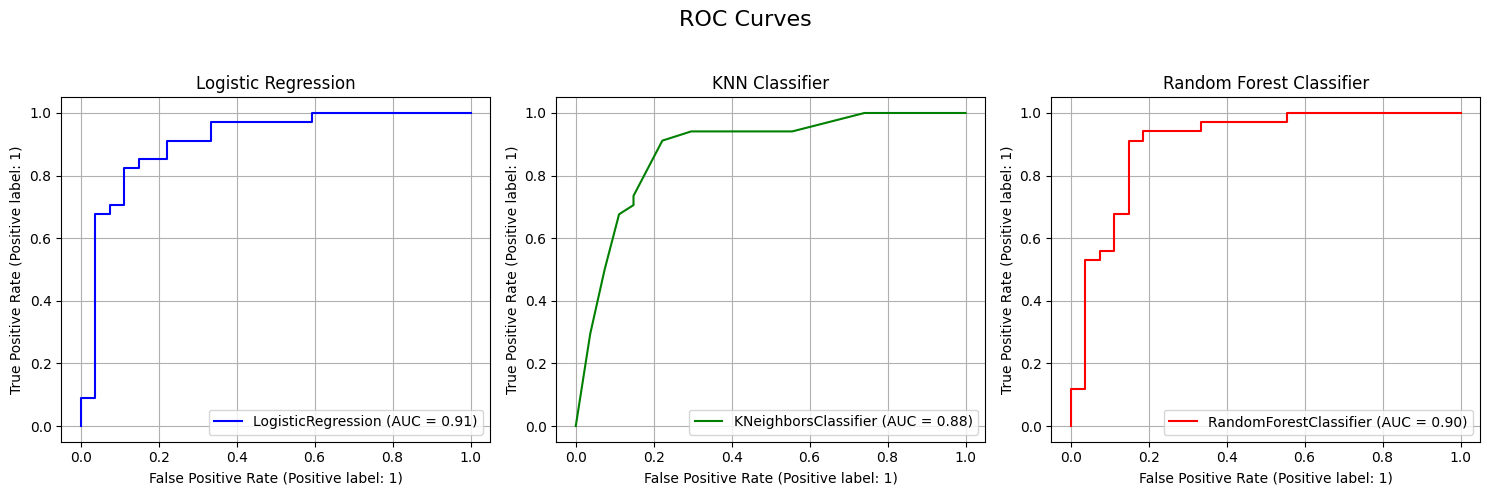

In [112]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

RocCurveDisplay.from_estimator(
    best_models["Logistic Regression"], X_test, y_test, ax=ax0, color="blue"
)
ax0.set_title("Logistic Regression")
ax0.grid(True)

RocCurveDisplay.from_estimator(
    best_models["KNN"], X_test, y_test, ax=ax1, color="green"
)
ax1.set_title("KNN Classifier")
ax1.grid(True)

RocCurveDisplay.from_estimator(
    best_models["RandomForestClassifier"], X_test, y_test, ax=ax2, color="red"
)
ax2.set_title("Random Forest Classifier")
ax2.grid(True)

fig.suptitle("ROC Curves", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("reports/10-roc_curves.png")

plt.show()

Receiver Operating Characteristic (ROC) curves for three machine learning classifiers: Random Forest, KNN, and Logistic Regression. The ROC curves evaluate the performance of these models in distinguishing between classes. The best model is the one with the highest area under the ROC curve (AUC). 

These results highlight that both the Random Forest and Logistic Regression models have superior classification capabilities compared to the KNN model.

#### 2. Confusion matrix

In [113]:
(
    confusion_matrix(y_test, y_preds_log_reg),
    confusion_matrix(y_test, y_preds_knn),
    confusion_matrix(y_test, y_preds_rf),
)

(array([[21,  6],
        [ 4, 30]], dtype=int64),
 array([[23,  4],
        [ 9, 25]], dtype=int64),
 array([[23,  4],
        [ 3, 31]], dtype=int64))

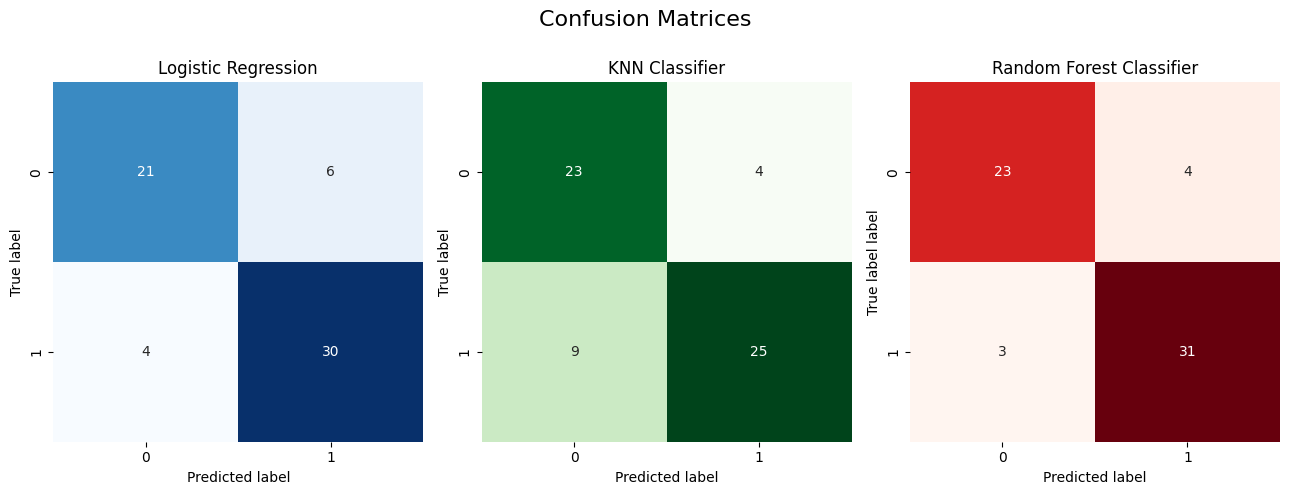

In [114]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))

sns.heatmap(
    confusion_matrix(y_test, y_preds_log_reg),
    annot=True,
    cbar=False,
    ax=ax0,
    cmap=plt.cm.Blues,
)
ax0.set_title("Logistic Regression")
ax0.set_ylabel("True label")
ax0.set_xlabel("Predicted label")

sns.heatmap(
    confusion_matrix(y_test, y_preds_knn),
    annot=True,
    cbar=False,
    ax=ax1,
    cmap=plt.cm.Greens,
)
ax1.set_title("KNN Classifier")
ax1.set_ylabel("True label")
ax1.set_xlabel("Predicted label")

sns.heatmap(
    confusion_matrix(y_test, y_preds_rf),
    annot=True,
    cbar=False,
    ax=ax2,
    cmap=plt.cm.Reds,
)
ax2.set_title("Random Forest Classifier")
ax2.set_ylabel("True label label")
ax2.set_xlabel("Predicted label")

fig.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.savefig("reports/11-confusion_matrices.png")

plt.show()

The image shows three confusion matrices for different classifiers: Random Forest, KNN and Logistic Regression. Each matrix is a 2x2 grid displaying the counts of true positives, false positives, false negatives, and true negatives.

These matrices help visualize and compare the performance of each model in classifying data correctly. **Random Forest Classifier** is the **best performing model**.

#### 3. Classification report

In [115]:
for model, y_pred in zip(model_scores_best, y_preds):
    report = classification_report(
        y_test, y_pred, target_names=["No Disease", "Disease"]
    )
    print(model)
    print(report)

Logistic Regression
              precision    recall  f1-score   support

  No Disease       0.84      0.78      0.81        27
     Disease       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

KNN
              precision    recall  f1-score   support

  No Disease       0.72      0.85      0.78        27
     Disease       0.86      0.74      0.79        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

RandomForestClassifier
              precision    recall  f1-score   support

  No Disease       0.88      0.85      0.87        27
     Disease       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89    

Random Forest Classifier has the highest accuracy and balanced precision and recall for both classes. The KNN Classifier has lower accuracy and a bit of imbalance between precision and recall. Logistic Regression performs well but is worse than Random Forest in all metrics. So our **best model** is **Random Forest Classifier**.

#### 4. Accuracy, Precision, Recall, and F1-score (Cross-validated)

In [116]:
# Cross-validated Metrics
metrics = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
metrics["Model"] = ["Random Forest Classifier", "KNN", "Logistic Regression"]
metrics

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Cross-validated accuracy

In [117]:
np.random.seed(42)

metrics["Accuracy"][metrics["Model"] == "Random Forest Classifier"] = cross_val_score(
    best_models["RandomForestClassifier"], X, y, cv=5, scoring="accuracy"
).mean()

metrics["Accuracy"][metrics["Model"] == "KNN"] = cross_val_score(
    best_models["KNN"], X, y, cv=5, scoring="accuracy"
).mean()

metrics["Accuracy"][metrics["Model"] == "Logistic Regression"] = cross_val_score(
    best_models["Logistic Regression"], X, y, cv=5, scoring="accuracy"
).mean()

metrics

,Model,Accuracy,Precision,Recall,F1
0,Random Forest Classifier,0.840601,NaN,NaN,NaN
1,KNN,0.813934,NaN,NaN,NaN
2,Logistic Regression,0.837213,NaN,NaN,NaN


Cross-validated precision

In [118]:
np.random.seed(42)

metrics["Precision"][metrics["Model"] == "Random Forest Classifier"] = cross_val_score(
    best_models["RandomForestClassifier"], X, y, cv=5, scoring="precision"
).mean()

metrics["Precision"][metrics["Model"] == "KNN"] = cross_val_score(
    best_models["KNN"], X, y, cv=5, scoring="precision"
).mean()

metrics["Precision"][metrics["Model"] == "Logistic Regression"] = cross_val_score(
    best_models["Logistic Regression"], X, y, cv=5, scoring="precision"
).mean()

metrics

,Model,Accuracy,Precision,Recall,F1
0,Random Forest Classifier,0.840601,0.831545,NaN,NaN
1,KNN,0.813934,0.813719,NaN,NaN
2,Logistic Regression,0.837213,0.828399,NaN,NaN


Cross-validated recall

In [119]:
np.random.seed(42)

metrics["Recall"][metrics["Model"] == "Random Forest Classifier"] = cross_val_score(
    best_models["RandomForestClassifier"], X, y, cv=5, scoring="recall"
).mean()

metrics["Recall"][metrics["Model"] == "KNN"] = cross_val_score(
    best_models["KNN"], X, y, cv=5, scoring="recall"
).mean()

metrics["Recall"][metrics["Model"] == "Logistic Regression"] = cross_val_score(
    best_models["Logistic Regression"], X, y, cv=5, scoring="recall"
).mean()

metrics


,Model,Accuracy,Precision,Recall,F1
0,Random Forest Classifier,0.840601,0.831545,0.890341,NaN
1,KNN,0.813934,0.813719,0.859848,NaN
2,Logistic Regression,0.837213,0.828399,0.890341,NaN


Cross-validated f1-score

In [120]:
np.random.seed(42)

metrics["F1"][metrics["Model"] == "Random Forest Classifier"] = cross_val_score(
    best_models["RandomForestClassifier"], X, y, cv=5, scoring="f1"
).mean()
metrics["F1"][metrics["Model"] == "KNN"] = cross_val_score(
    best_models["KNN"], X, y, cv=5, scoring="f1"
).mean()
metrics["F1"][metrics["Model"] == "Logistic Regression"] = cross_val_score(
    best_models["Logistic Regression"],
    X,
    y,
    cv=5,
    scoring="f1",
).mean()

metrics

,Model,Accuracy,Precision,Recall,F1
0,Random Forest Classifier,0.840601,0.831545,0.890341,0.859176
1,KNN,0.813934,0.813719,0.859848,0.83464
2,Logistic Regression,0.837213,0.828399,0.890341,0.856459


Visualize cross-validated metrics

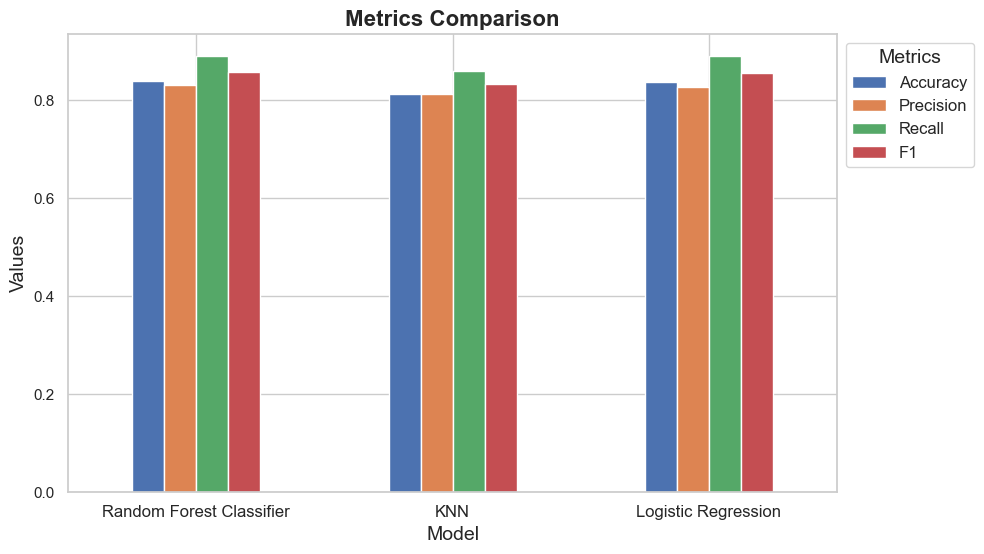

In [121]:
sns.set(style="whitegrid")

metrics.set_index("Model", inplace=True)

ax = metrics.plot.bar(figsize=(10, 6))

plt.title("Metrics Comparison", fontsize=16, fontweight="bold")

plt.xticks(rotation=0, fontsize=12)

plt.xlabel("Model", fontsize=14)

plt.ylabel("Values", fontsize=14)


plt.legend(
    fontsize=12,
    title="Metrics",
    title_fontsize=14,
    bbox_to_anchor=(1, 1),
    loc="upper left",
)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("reports/12-metrics_comparison.png")

plt.show()

Overall Accuracy
- **Random Forest Classifier** has the highest overall accuracy, indicating it correctly predicted the most cases. Slightly lower accuracy has Logistic Regression.

Precision and Recall
- **Random Forest** and **Logistic Regression** have same recall, while **Random Forest** has little higher precision.

F1-score
- **Random Forest Classifier** has the highest F1-score, indicating a good balance between precision and recall. Slightly better than Logistic Regression.


Based on these metrics, **Random Forest Classifier** appears to be the most suitable model for heart disease prediction in this case. It offers the highest overall accuracy and F1-score, suggesting it can effectively balance precision and recall. Almost same model is Logistic Regression.


### Saving our best model

In [122]:
# Save final model
final_model = best_models["RandomForestClassifier"]

joblib.dump(final_model, "models/final_model.pkl")

['models/final_model.pkl']

## Feature Importance

In [123]:
final_model.feature_importances_

array([0.06477807, 0.03159113, 0.19574156, 0.01974347, 0.02931079,
       0.00082917, 0.01589533, 0.09243088, 0.14391616, 0.05576936,
       0.07311407, 0.15114502, 0.12573499])

In [124]:
feature_dict = dict(zip(df.columns, list(final_model.feature_importances_)))

In [125]:
feature_dict

{'age': 0.06477807377397518,
 'sex': 0.03159112712142584,
 'cp': 0.1957415617469392,
 'trestbps': 0.019743473401290665,
 'chol': 0.029310786025851066,
 'fbs': 0.0008291706270440994,
 'restecg': 0.01589533000587406,
 'thalach': 0.09243087534760835,
 'exang': 0.14391616080862307,
 'oldpeak': 0.05576936383245952,
 'slope': 0.07311406849107109,
 'ca': 0.15114502068047864,
 'thal': 0.1257349881373593}

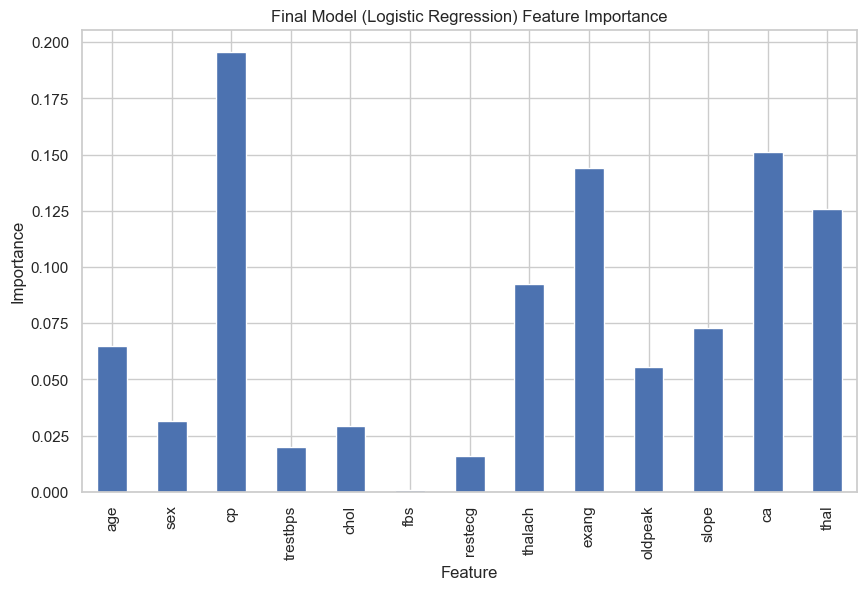

In [126]:
feature_dict_rf_df = pd.DataFrame(feature_dict, index=[0])
feature_dict_rf_df.T.plot(
    kind="bar",
    figsize=(10, 6),
    legend=False,
    title="Final Model (Logistic Regression) Feature Importance",
    xlabel="Feature",
    ylabel="Importance",
)

plt.savefig("reports/13-feature_importance_final_model.png")

plt.show()

From the feature importance plot we can see that **cp**, **exang**, **oldpeak**, **slope**, **ca** and **thal** are the most important features. Other features are less important. We can also see that **fbs** is not an important feature (we can remove it). According feature importance we can make better model, if we remove some features training time will be shorter. 

## Conclusion

In this heart disease prediction project, we conducted a comprehensive analysis starting from problem definition and data preparation, including handling missing values and outliers, followed by exploratory data analysis (EDA) to understand feature distributions and relationships. We then built and compared three machine learning models—K-Nearest Neighbors, Random Forest Classifier, and Logistic Regression—using techniques like scaling and hyperparameter tuning (manual, RandomizedSearchCV, and GridSearchCV) to optimize performance. After evaluating the models based on metrics such as ROC curve, AUC score, confusion matrix, and classification reports, we identified the **Random Forest Classifier** as the best model. Finally, we conducted a feature importance analysis to understand which factors were most influential in predicting heart disease. This systematic approach allowed us to develop a robust predictive model and gain valuable insights into the key indicators of heart disease. All figures generated during the analysis are saved in the `/reports` folder, all datasets used are stored in the `/data` folder and all models created are saved in the `/models` folder.
